# Serie de Fourier:
# Espectro discreto de frecuencia
**Autor:** Martínez Torres Marcos Alfonso, Facultad de Ingeniería, UNAM

Licensed under <a href="https://creativecommons.org/licenses/by-nc-nd/4.0?ref=chooser-v1">Attribution-NonCommercial-NoDerivatives 4.0 International</a>

## Teoría

### Espectros discretos de amplitud y fase 

Cuando una función periódica de periodo T se representa mediante la serie de Fourier
$$
\begin{equation}
f_a(t)=\sum_{k=-N}^N\mathscr{D}_k\exp^{\frac{i2\pi kt}{T}}, \tag{7}
\end{equation}
$$
el inverso del periodo de la función que se este representando será $\frac{1}{T} = f_0$, donde $f_0$ se le conoce como la **frecuencia fundamental de la serie de Fourier** y a los coeficientes $\mathscr{D}_k$ como los **armónicos de la función**. Algunos autores trabajan con la variable $\omega$, donde $\omega = \frac{2\pi}{T}$, de modo que $\omega = 2\pi f_0$.<br>
Para obtener lo que se denomina *espectro de amplitud y de fase* de una función, se grafica su
$$
\begin{align*}
|\mathscr{D}_k|\;\text{vs}\;kf_0 ,&\hspace{2cm}\text{Espectro de amplitud}\\
y\\
\phi_k\;\text{vs}\;kf_0 ,&\hspace{2cm}\text{Espectro de fase}\\
&&k = 0,\pm 1,\pm 2, \pm 3, ...
\end{align*}

$$

### Importancia de los espectros de amplitud y de fase

Los espectros son otra forma de representar una función en un nuevo dominio que es el de la frecuencia; dicha representación es unívoca.<br><br>
Cada valor $|\mathscr{D}_k|$ representa la amplitud de un componente sinusoidal, la cual tendrá su correspondiente ángulo de fase $\phi_k$. Este ángulo de fase nos indicara con que ángulo o desfasamiento entra la señal respecto al origen. Por lo tanto, al efectuar la suma de todas las funciones cosenoidales podremos reconstruir la función original.<br><br>
El *espectro de amplitud* representa la amplitud de cada componente de la sinusoidal como una función de la frecuencia y es de simetría **par**; el *espectro de fase* , es de simetría **impar**, nos indica el tiempo de retraso respecto al origen que tiene cada uno de los componentes.

## Ejemplo



Del ejemplo 1.5 de las notas de Anguiano.<br>
Dada $u(t) = t$ en $t\:\epsilon\:(-\pi,\pi)$, obtener su función aproximada mediante la serie de Fourier, y graficar sus espectros de frecuencia y amplitud

### Solución

Se importan las bibliotecas de Python
* *numpy* : Permite crear y gestionar arreglos multidimensionales, junto con una gran colección de funciones matemáticas de alto nivel que operan sobre estos arreglos. El sitio oficial es https://numpy.org/
* *matplotlib* : Permite crear visualizaciones estáticas, animadas e interactivas en 2D y 3D. El sitio oficial es https://matplotlib.org/
* *scipy* : Es una colección de herramientas y algoritmos matemáticos para Python. Esta librería proporciona funciones para realizar integración numérica, es decir, calcular el valor numérico de una integral definida. La función quad se utiliza específicamente para calcular la integral numérica de una función en un intervalo definido. El sitio oficial es https://scipy.org/
* *tabulate*: es una biblioteca de Python que permite formatear y imprimir tablas en la consola de manera sencilla y elegante. El sitio oficial es https://pypi.org/project/tabulate/

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import tabulate

#### Definición de aspectos básicos

En esta seccion se definen calculos escenciales como:
* el periodo (T),
* el vector independiente "t"(tiempo),
* creacion de funciones necesarias para el calculo de la serie de Fourier

##### Calculos para la serie de Fourier (compleja)

In [112]:
# Para mayor comodidad creamos una constante i puramente imaginaria
i = complex(0,1)
# Otra forma de scribir un número imaginario en Python seria:
# i = 0 + 1j, j es la forma de representar a los imaginarios en Python
# Donde j es la forma de representar a la parte imaginaria

In [113]:
# definimos nuestra función original f(t), el ejercicio la llama u(t)
def u(t):
    return t

In [114]:
# Funcion que genera el k-ésimo coeficiente Dk
def Dk (u,k):
    coef = complex(1/T,0)
    Dk_real = quad(lambda t: (u(t)*np.exp(-(i*2*np.pi*k*t)/T)).real,-np.pi,np.pi)[0]
    Dk_imag = quad(lambda t: (u(t)*np.exp(-(i*2*np.pi*k*t)/T)).imag,-np.pi,np.pi)[0]
    Dk = coef*complex(Dk_real,Dk_imag)
    return Dk

In [115]:
#Funcion que genera la serie de Fourier
def SF(u,N,t):
    SF_complex = complex(0,0)
    for k in range(-N,N+1):
        dk = Dk(u,k)
        SF_complex += dk*np.exp((i*2*np.pi*k*t)/T)
    return SF_complex

In [116]:
# Creamos el periodo
ti = -np.pi # valor inicial
tf = np.pi # valor final
T = tf - ti

In [117]:
# Intervalo de la variable independiente
t = np.linspace(ti,tf,100) 

In [118]:
# Constante N que indica la cantida de coeficientes Dk
N = int(input('Aproximación de puntos Dk:'))

In [119]:
# Creamos la funcion aproximada, llamando a la funcion SF, que genera la serie de fourier
fa = SF(u,N,t)

##### Calculos para los espectros de Amplitud y Fase

A continuación se muestran los cálculos para crear el espectro de amplitud y frecuencia de la funcion original

In [121]:
# Calculo de los coeficientes Dk
dk_vec = [Dk(u, k) for k in range(-N, N+1)]
# Calculo de las magnitudes
mod_dk = [abs(dk) for dk in dk_vec]
# Calculo de las fases
phi_k = [np.angle(dk,deg = False) for dk in dk_vec]

la funcion de *numpy* "angle" calcula la fase de un numero complejo, "deg = False" cambia el resultado de grados a radianes

In [122]:
#Vector de frecuencias
kf0 = 1/T * np.arange(-N,N+1)

#### Graficas y tablas

En esta sección se encuentra:
* Grafica de comparación entre la funcion originbal y la función aproximada
* Grafica de los espectros de amplitud y frecuencia de la funcion original
* Tabla de valores de los espectros

##### Comparación entre la función original y la función aproximada

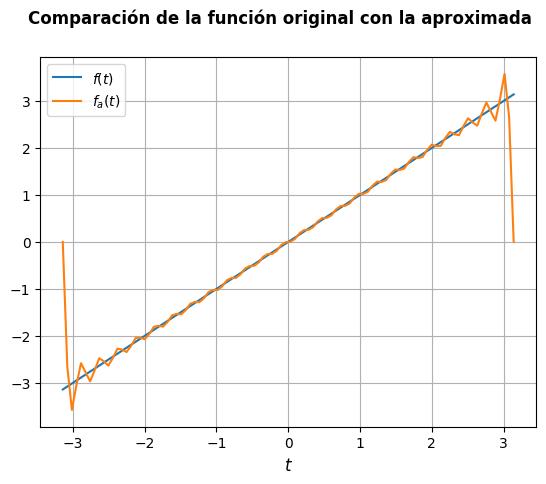

In [123]:
# Se crea la figura
fig = plt.figure()

# Se grafica el vector de la función original con respecto al vector de la variable independiente
plt.plot(t, u(t), label='$f(t)$')

# Se grafica el vector de la función aproximada con respecto al vector de la variable independiente
plt.plot(t, fa.real, label='$f_a(t)$')

# Se edita la figura
plt.xlabel('$t$', fontsize=12)  # Se escribe la etiqueta del eje de la variable independiente en tamaño de letra 12
plt.suptitle('Comparación de la función original con la aproximada', weight='bold')  # Se escribe el título de la gráfica
plt.grid()  # Se grafica la cuadrícula
plt.legend()  # Se imprime la leyenda

# Mostrar la gráfica
plt.show()

##### Grafica de los espectros de amplitud y frecuencia

<Figure size 640x480 with 0 Axes>

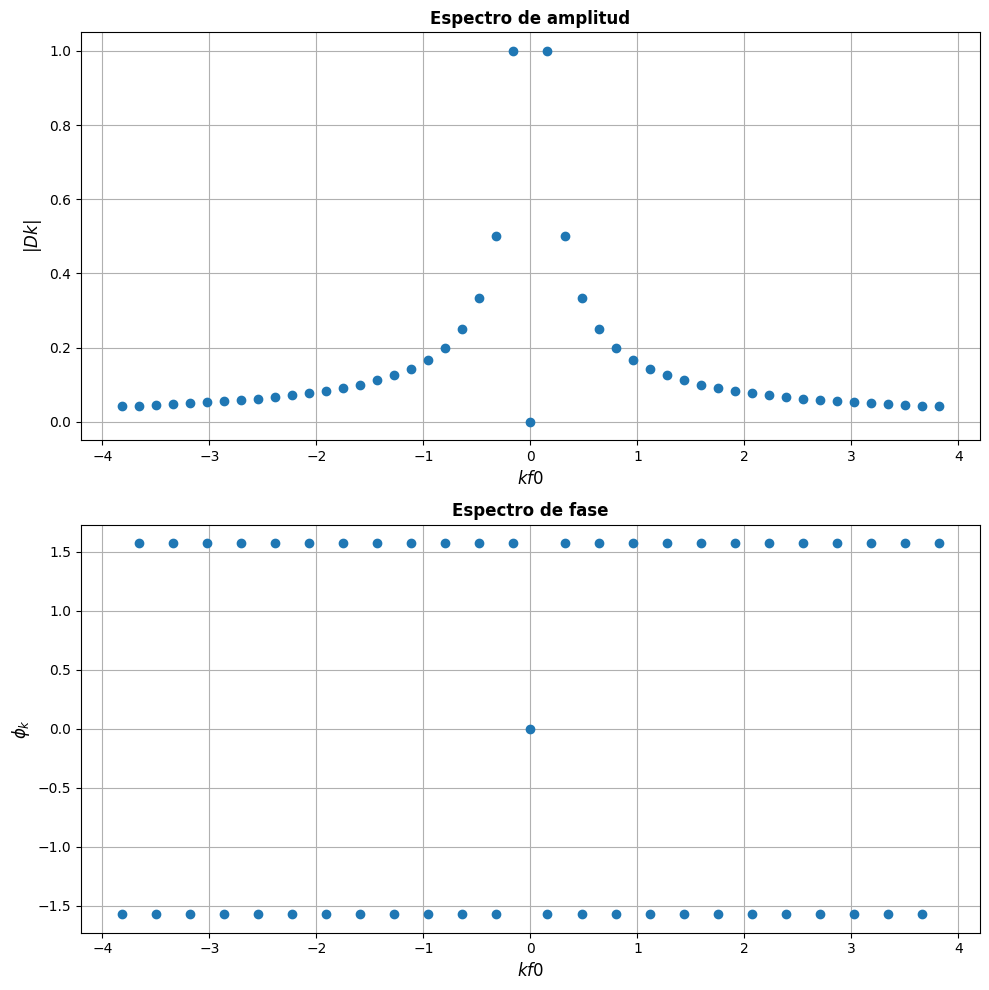

In [126]:
# Se crea la figura
fig = plt.figure()
plt.figure(figsize=(10, 10))

# Se gráfica el espectro de amplitud
plt.subplot(2,1,1)
plt.title('Espectro de amplitud', weight='bold')  # Se escribe el título de la gráfica
plt.plot(kf0, mod_dk,"o", linestyle = '')
plt.xlabel('$kf0$', fontsize = 12)
plt.ylabel('$|Dk|$', fontsize = 12)
plt.grid()

# Se grafica el espectro de fase
plt.subplot(2,1,2)
plt.title('Espectro de fase', weight='bold')  # Se escribe el título de la gráfica
plt.plot(kf0, phi_k,"o",linestyle = '')
plt.xlabel('$kf0$', fontsize = 12)
plt.ylabel(r'$\phi_k$', fontsize = 12)
plt.grid()

# Mostrar la gráfica
plt.tight_layout()
plt.show()

##### Tabla de valores

In [125]:
# Crea la tabla
tabla = list(zip(kf0, mod_dk, range(-N, N+1), phi_k))

# Imprimir la tabla
encabezados = ['kf0', 'MOD Dk', 'k', 'Phi_k']
print(tabulate.tabulate(tabla, headers=encabezados, tablefmt='orgtbl'))

|       kf0 |    MOD Dk |   k |   Phi_k |
|-----------+-----------+-----+---------|
| -3.81972  | 0.0416667 | -24 | -1.5708 |
| -3.66056  | 0.0434783 | -23 |  1.5708 |
| -3.50141  | 0.0454545 | -22 | -1.5708 |
| -3.34225  | 0.047619  | -21 |  1.5708 |
| -3.1831   | 0.05      | -20 | -1.5708 |
| -3.02394  | 0.0526316 | -19 |  1.5708 |
| -2.86479  | 0.0555556 | -18 | -1.5708 |
| -2.70563  | 0.0588235 | -17 |  1.5708 |
| -2.54648  | 0.0625    | -16 | -1.5708 |
| -2.38732  | 0.0666667 | -15 |  1.5708 |
| -2.22817  | 0.0714286 | -14 | -1.5708 |
| -2.06901  | 0.0769231 | -13 |  1.5708 |
| -1.90986  | 0.0833333 | -12 | -1.5708 |
| -1.7507   | 0.0909091 | -11 |  1.5708 |
| -1.59155  | 0.1       | -10 | -1.5708 |
| -1.43239  | 0.111111  |  -9 |  1.5708 |
| -1.27324  | 0.125     |  -8 | -1.5708 |
| -1.11408  | 0.142857  |  -7 |  1.5708 |
| -0.95493  | 0.166667  |  -6 | -1.5708 |
| -0.795775 | 0.2       |  -5 |  1.5708 |
| -0.63662  | 0.25      |  -4 | -1.5708 |
| -0.477465 | 0.333333  |  -3 |  1